# Deterministic Random Walks

## Node Based

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [148]:
def deterministic_random_walk(G, w0, t, r):
    """
    Simulates a deterministic random walk on a graph.

    Parameters:
        G (networkx.Graph): The input graph on which the random walk is performed.
        w0 (dict): A dictionary mapping each node to a list representing the initial number of walkers at that node.
        t (int): The number of time steps for the random walk simulation.
        r (float): The proportion of walkers that move to neighboring nodes at each time step.

    Returns:
        dict: A dictionary mapping each node to a list of the number of walkers at each time step.
    """
    wt = w0 # initial conditions
    degree_dict = dict(nx.degree(G))

    for t in range(t-1):
        for i, n_walkers_list in wt.items():
            n_walkers = n_walkers_list[-1] # get W_i(t)
            neighbours = list(G.neighbors(i)) 
            total_in = 0
            for j in neighbours:
                total_in += r*wt[j][t]/degree_dict[j] # get sum of r*W_j(t)/k_j (incoming walkers from all neighbours)
            n_walkers_new = n_walkers - r*n_walkers + total_in
            wt[i].append(n_walkers_new)
    return wt


In [167]:
er_network = nx.erdos_renyi_graph(100, 0.05)
W = 1000
wt0 = {i: [0] if i != 0 else [1000] for i in er_network.nodes()} # all walkers start on node 0
wi = deterministic_random_walk(er_network, wt0, 100, 0.5)
wi

{0: [1000,
  500.0,
  283.36940836940835,
  175.05411255411255,
  115.13418147842751,
  79.52149670448732,
  57.20183374061472,
  42.622642271295135,
  32.773203662300375,
  25.928033644645726,
  21.053993892057754,
  17.509802316962674,
  14.884999879916466,
  12.90972419559699,
  11.402265972265798,
  10.237618727089872,
  9.328095739260625,
  8.611089776197815,
  8.041171635876006,
  7.584886235829257,
  7.217261580248531,
  6.919426552473935,
  6.6769593675260195,
  6.478725482243762,
  6.3160484530361165,
  6.182110557053942,
  6.071514133742372,
  5.979956802665634,
  5.903988356450808,
  5.84082691718398,
  5.788218572497534,
  5.744329248906431,
  5.707660727180278,
  5.6769849095246485,
  5.651292009467038,
  5.629749451861892,
  5.611669076836517,
  5.596480829491742,
  5.58371154987357,
  5.572967799008273,
  5.563921897398782,
  5.556300534068939,
  5.549875442534323,
  5.544455746139576,
  5.539881657131966,
  5.536019277562074,
  5.532756299980564,
  5.529998445177724,
  

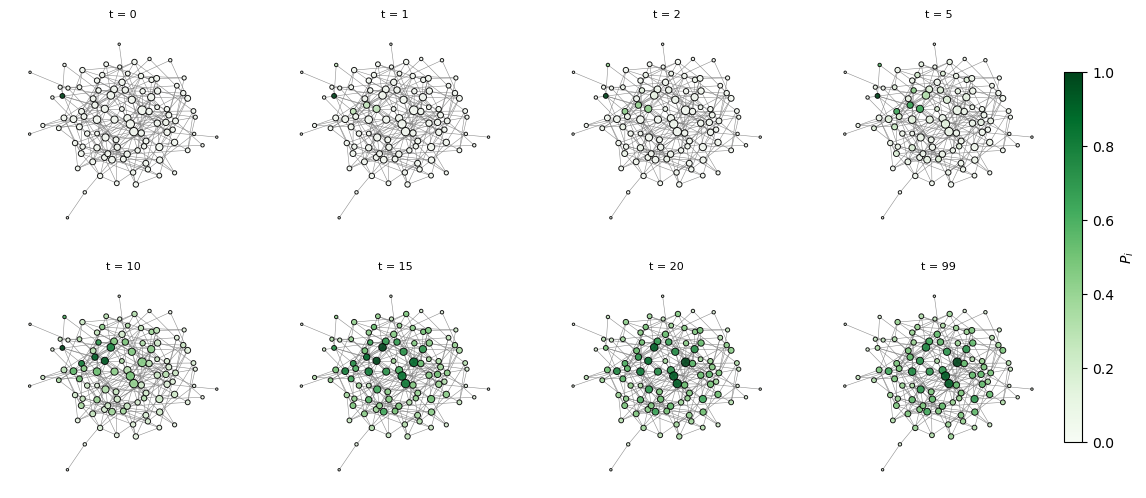

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pos = nx.kamada_kawai_layout(er_network)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
ax = ax.flatten()  # Flatten the 2D array of axes to make it iterable

# Create a colormap and normalize for the colorbar
cmap = plt.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=1)  # Adjust vmin and vmax as needed

for e, i in enumerate((0, 1, 2, 5, 10, 15, 20, 99)):
    stationary_distribution = [w[i] / W for w in wi.values()]
    nx.draw(er_network, pos=pos, node_size=[k * 3 for k in dict(er_network.degree()).values()], width=0.4,
            node_color=stationary_distribution, cmap=cmap, alpha=0.9, edge_color='grey',edgecolors="black", 
            linewidths = 0.7, ax=ax[e])
    ax[e].set_title(f"t = {i}", fontsize = 8)




# Add a single colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for compatibility with colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.8, pad=0.01)
cbar.set_label("$P_i$")

plt.show()


In [168]:
ba_network = nx.barabasi_albert_graph(100, 3)
W = 1000
wt0 = {i: [0] if i != 0 else [1000] for i in ba_network.nodes()} # all walkers start on node 0
wi_ba = deterministic_random_walk(ba_network, wt0, 100, 0.5)

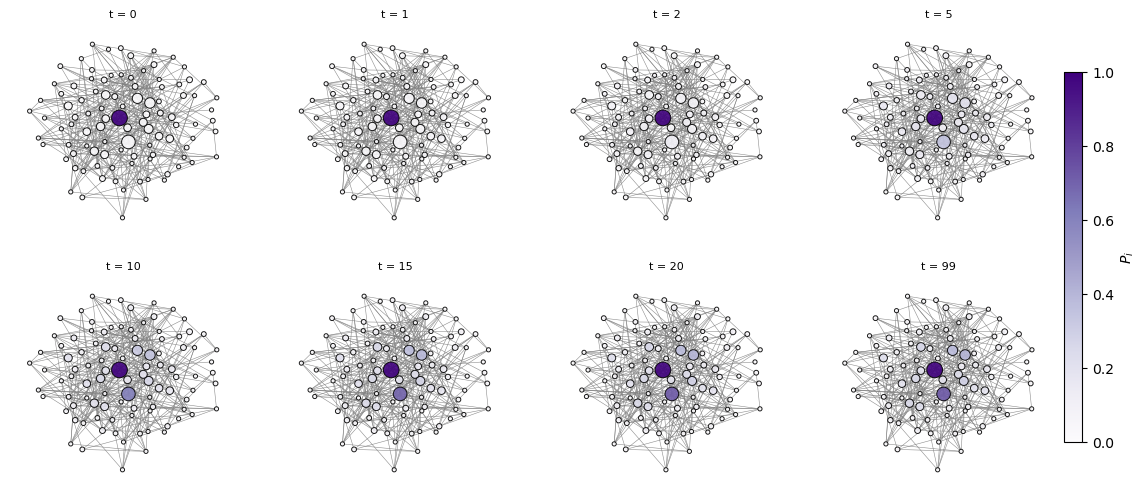

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pos = nx.kamada_kawai_layout(ba_network)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
ax = ax.flatten()  # Flatten the 2D array of axes to make it iterable

# Create a colormap and normalize for the colorbar
cmap = plt.cm.Purples
norm = mpl.colors.Normalize(vmin=0, vmax=1)  # Adjust vmin and vmax as needed

for e, i in enumerate((0, 1, 2, 5, 10, 15, 20, 99)):
    stationary_distribution = [w[i] / W for w in wi_ba.values()]
    nx.draw(er_network, pos=pos, node_size=[k * 3 for k in dict(ba_network.degree()).values()], width=0.4,
            node_color=stationary_distribution, cmap=cmap, alpha=0.9, edge_color='grey',edgecolors="black", 
            linewidths = 0.7, ax=ax[e])
    ax[e].set_title(f"t = {i}", fontsize = 8)

# Add a single colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for compatibility with colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.8, pad=0.01)
cbar.set_label("$P_i$")

plt.show()


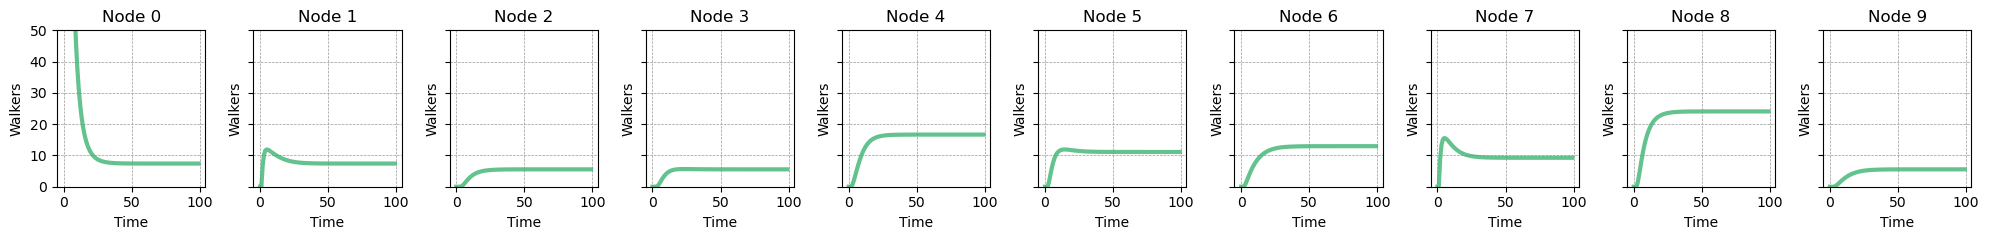

In [7]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2.5), sharey=True)

for i, (node, walkers) in enumerate(wi.items()):
    if i >= 10:
        break
    axes[i].plot(walkers, linewidth=3, color = "mediumseagreen", alpha = 0.8)
    axes[i].set_title(f'Node {node}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color = '#999999', linestyle = '--', linewidth = 0.5)
    axes[i].set_ylim(0, 50)

plt.tight_layout()
plt.show()

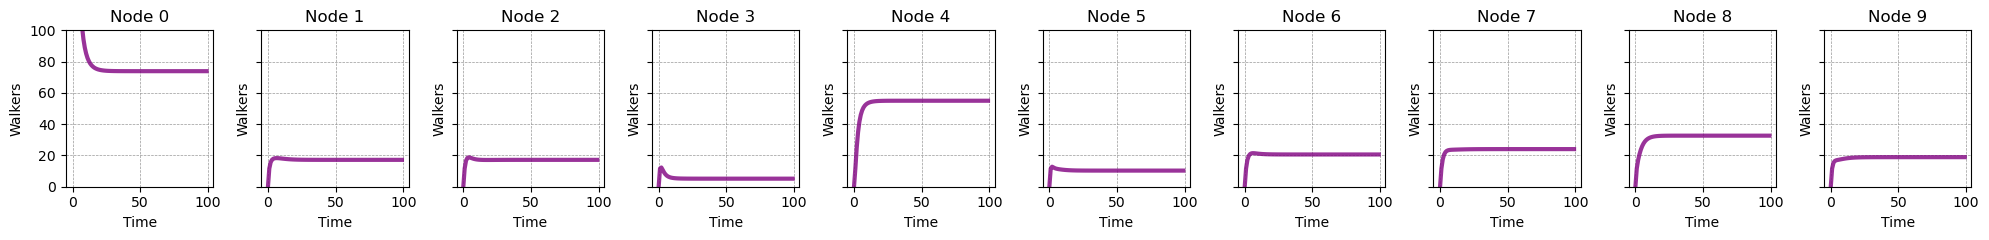

In [28]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2.5), sharey=True)

for i, (node, walkers) in enumerate(wi_ba.items()):
    if i >= 10:
        break
    axes[i].plot(walkers, linewidth=3, color = "purple", alpha = 0.8)
    axes[i].set_title(f'Node {node}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color = '#999999', linestyle = '--', linewidth = 0.5)
    axes[i].set_ylim(0, 100)

plt.tight_layout()
plt.show()

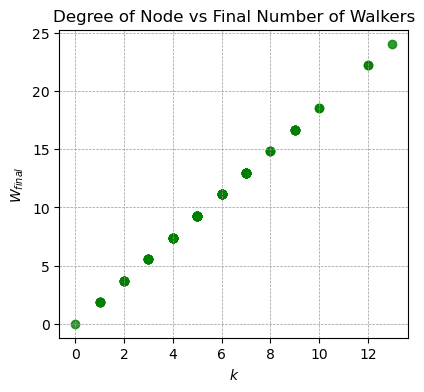

In [9]:
# Get the degree of each node
degrees = dict(er_network.degree())

# Get the final number of walkers for each node
final_walkers = {node: walkers[-1] for node, walkers in wi.items()}

# Create lists for degrees and final walkers
x = [degrees[node] for node in degrees]
y = [final_walkers[node] for node in final_walkers]

# Plot the scatterplot
plt.figure(figsize=(4.5, 4))
plt.scatter(x, y, color='green', alpha=0.8)
plt.xlabel('$k$')
plt.ylabel('$W_{final}$')
plt.title('Degree of Node vs Final Number of Walkers')
plt.grid(color = '#999999', linestyle = '--', linewidth = 0.5)
plt.show()

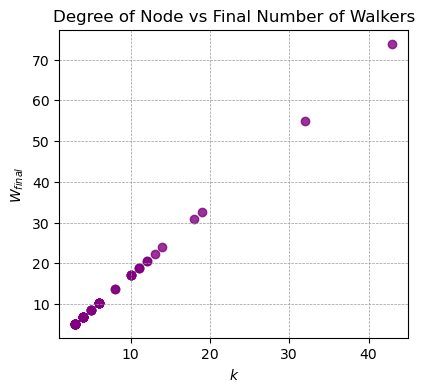

In [10]:
# Get the degree of each node
degrees = dict(ba_network.degree())

# Get the final number of walkers for each node
final_walkers = {node: walkers[-1] for node, walkers in wi_ba.items()}

# Create lists for degrees and final walkers
x = [degrees[node] for node in degrees]
y = [final_walkers[node] for node in final_walkers]

# Plot the scatterplot
plt.figure(figsize=(4.5, 4))
plt.scatter(x, y, color='purple', alpha=0.8)
plt.xlabel('$k$')
plt.ylabel('$W_{final}$')
plt.title('Degree of Node vs Final Number of Walkers')
plt.grid(color = '#999999', linestyle = '--', linewidth = 0.5)
plt.show()

## Convergence Speed

In [80]:
dict(nx.degree(ba_network))

{0: 43,
 1: 10,
 2: 10,
 3: 3,
 4: 32,
 5: 6,
 6: 12,
 7: 14,
 8: 19,
 9: 11,
 10: 10,
 11: 18,
 12: 10,
 13: 13,
 14: 4,
 15: 12,
 16: 4,
 17: 6,
 18: 10,
 19: 11,
 20: 6,
 21: 6,
 22: 6,
 23: 5,
 24: 11,
 25: 5,
 26: 8,
 27: 6,
 28: 5,
 29: 4,
 30: 6,
 31: 3,
 32: 3,
 33: 8,
 34: 4,
 35: 6,
 36: 6,
 37: 3,
 38: 6,
 39: 3,
 40: 4,
 41: 4,
 42: 4,
 43: 5,
 44: 3,
 45: 4,
 46: 6,
 47: 4,
 48: 4,
 49: 4,
 50: 6,
 51: 3,
 52: 4,
 53: 3,
 54: 4,
 55: 4,
 56: 4,
 57: 3,
 58: 3,
 59: 5,
 60: 4,
 61: 6,
 62: 3,
 63: 3,
 64: 4,
 65: 4,
 66: 3,
 67: 3,
 68: 3,
 69: 3,
 70: 3,
 71: 3,
 72: 3,
 73: 4,
 74: 4,
 75: 4,
 76: 3,
 77: 3,
 78: 4,
 79: 3,
 80: 3,
 81: 3,
 82: 3,
 83: 3,
 84: 4,
 85: 3,
 86: 4,
 87: 3,
 88: 4,
 89: 3,
 90: 3,
 91: 3,
 92: 3,
 93: 3,
 94: 3,
 95: 3,
 96: 3,
 97: 3,
 98: 3,
 99: 3}

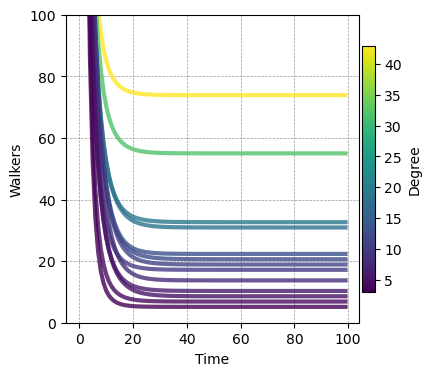

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))

W = 1000
starting_nodes = [0, 4, 8, 11, 13, 15, 19, 12, 26, 20, 23, 29, 31]
degrees = [dict(nx.degree(ba_network))[i] for i in starting_nodes]

# Normalize the degrees for colormap
norm = mpl.colors.Normalize(vmin=min(degrees), vmax=max(degrees))
cmap = plt.cm.viridis

for s in starting_nodes:
    wt0 = {i: [0] if i != s else [1000] for i in ba_network.nodes()}  # all walkers start on node s
    wi_ba = deterministic_random_walk(ba_network, wt0, 100, 0.5)
    walkers = wi_ba[s]
    degree = dict(nx.degree(ba_network))[s]
    color = cmap(norm(degree))
    ax.plot(walkers, linewidth=3, color=color, alpha=0.8)

ax.set_xlabel('Time')
ax.set_ylabel('Walkers')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.set_ylim(0, 100)

# Add a colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for compatibility with colorbar
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", shrink=0.8, pad=0.01)
cbar.set_label('Degree')

plt.show()
    

## Degree Block Approximation

In [149]:
def degree_block_random_walk(G, w0, t, r):
    """
    Simulates a degree block approximation of a deterministic random walk on a graph.

    Parameters:
        G (networkx.Graph): The input graph on which the random walk is approximated.
        w0 (dict): A dictionary mapping each degree block (k) to a list representing the initial number of walkers in that block.
        t (int): The number of time steps for the random walk approximation.
        r (float): The proportion of walkers that move at each time step.
    
    Returns:
        dict: A dictionary mapping each degree block (k) to a list of the number of walkers at each time step.
    """
    wk = w0 # initial conqditions
    k_bar = sum(dict(G.degree()).values())/len(G.degree()) # average degree
    for i in range(t-1):
        for k, n_walkers_list in wk.items():
            n_walkers = n_walkers_list[-1] # get W_k(t)
            n_walkers_new = n_walkers - r*n_walkers + (k*r*W)/(k_bar*G.number_of_nodes()) # get W_k(t+1)
            wk[k].append(n_walkers_new)

    return wk
        

In [169]:
W = 1000
w0 = {i: [0] if i != 0 else [W] for i in ba_network.nodes()}
degree_dict = dict(nx.degree(ba_network))
max_degree = max(degree_dict.values())
wk_ba = {k: [0] for k in range(max_degree+1) if k in degree_dict.values()}
for i in ba_network.nodes():
    wk_ba[degree_dict[i]][0] += w0[i][0] 
wk_ba

{2: [0],
 3: [0],
 4: [0],
 5: [0],
 6: [0],
 7: [0],
 8: [0],
 9: [0],
 10: [0],
 11: [0],
 12: [0],
 14: [0],
 16: [0],
 18: [1000],
 22: [0],
 23: [0],
 25: [0]}

In [178]:
W = 1000
w0 = {i: [0] if i != 0 else [W] for i in er_network.nodes()}
degree_dict = dict(nx.degree(er_network))
max_degree = max(degree_dict.values())
wk = {k: [0] for k in range(max_degree+1) if k in degree_dict.values()}
for i in er_network.nodes():
    wk[degree_dict[i]][0] += w0[i][0] 

r = 0.5
t= 100

wk = degree_block_random_walk(er_network, wk, t, r)

W = 1000
w0 = {i: [0] if i != 0 else [W] for i in ba_network.nodes()}
degree_dict = dict(nx.degree(ba_network))
max_degree = max(degree_dict.values())
wk_ba = {k: [0] for k in range(max_degree+1) if k in degree_dict.values()}
for i in ba_network.nodes():
    wk_ba[degree_dict[i]][0] += w0[i][0] 

wk_ba = degree_block_random_walk(ba_network, wk_ba, t, r)

In [175]:
wk

{1: [0],
 2: [0],
 3: [0],
 4: [0],
 5: [0],
 6: [0],
 7: [0],
 8: [0],
 9: [0],
 10: [0],
 11: [0]}

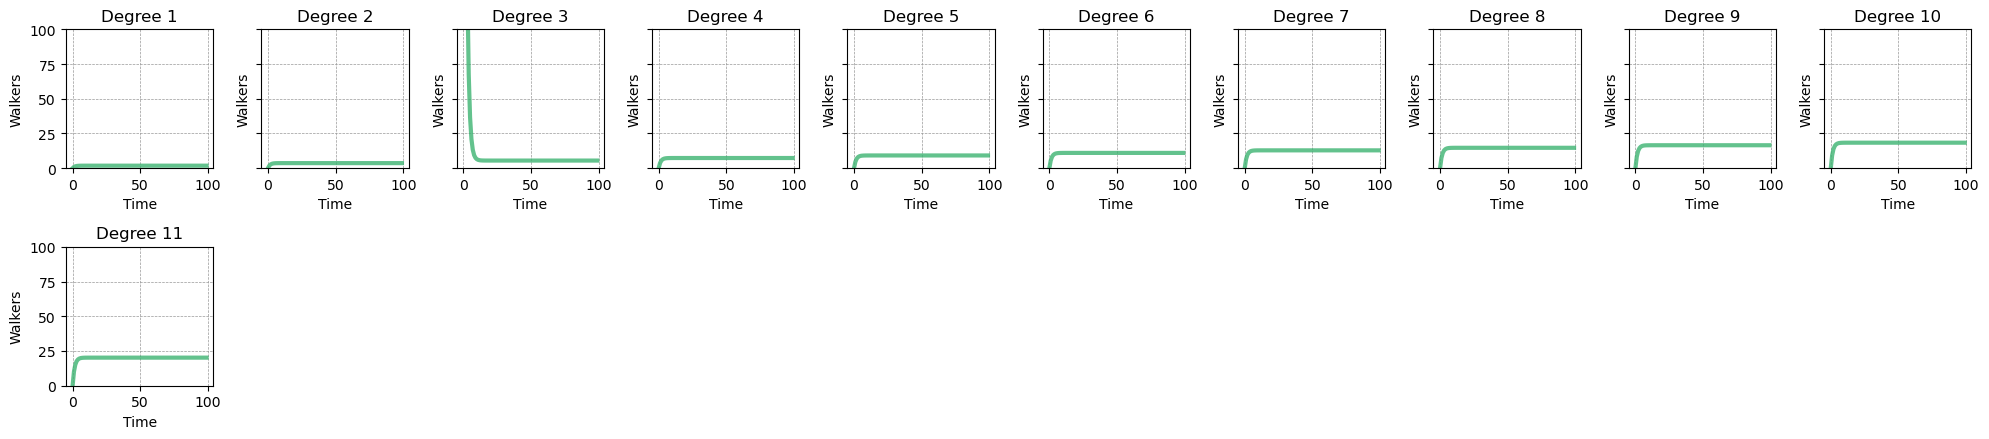

In [179]:
fig, axes = plt.subplots(2, 10, figsize=(20, 4.5), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
degrees = dict(er_network.degree())

# Plot the number of walkers in each degree class
for i, (degree_class, walkers) in enumerate(wk.items()):
    if i >= max(degrees.values())+1:  # Only plot the first 13 panels
        break
    axes[i].plot(walkers, linewidth=3, color="mediumseagreen", alpha=0.8)
    axes[i].set_title(f'Degree {degree_class}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color='#999999', linestyle='--', linewidth=0.5)
    axes[i].set_ylim(0, 100)

# Hide the remaining empty panels
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

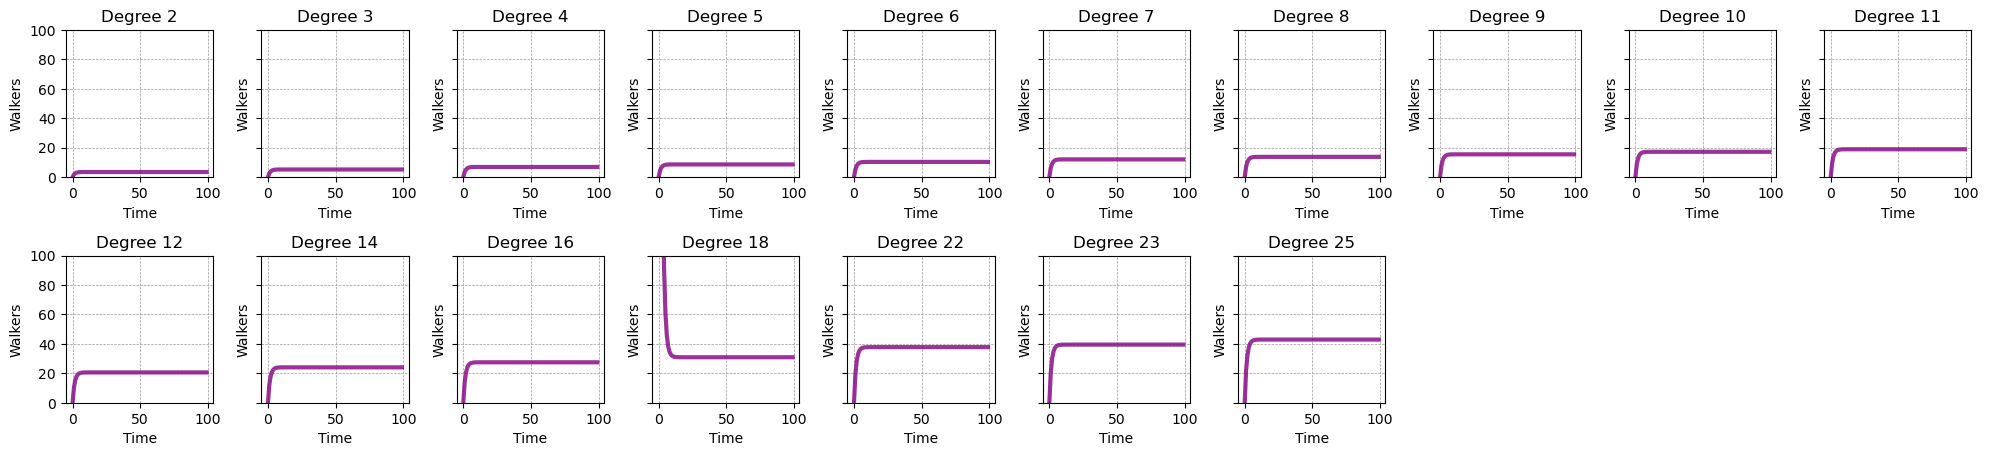

In [172]:
fig, axes = plt.subplots(5, 10, figsize=(20, 11), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
degrees = dict(ba_network.degree())
# Plot the number of walkers in each degree class
for i, (degree_class, walkers) in enumerate(wk_ba.items()):
    if i >= max(degrees.values())+1:  # Only plot the first panels
        break
    axes[i].plot(walkers, linewidth=3, color="purple", alpha=0.8)
    axes[i].set_title(f'Degree {degree_class}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color='#999999', linestyle='--', linewidth=0.5)
    axes[i].set_ylim(0, 100)

# Hide the remaining empty panels
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

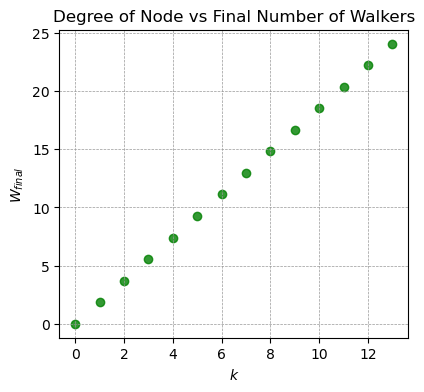

In [54]:
# Get the degree of each node
degrees = dict(er_network.degree())

# Get the final number of walkers for each node
final_walkers = {node: walkers[-1] for node, walkers in wk.items()}

# Create lists for degrees and final walkers
x = wk.keys()
y = [final_walkers[node] for node in final_walkers]

# Plot the scatterplot
fig, ax = plt.subplots(1,1, figsize=(4.5, 4))
ax.scatter(x, y, color='green', alpha=0.8)
ax.set_xlabel('$k$')
ax.set_ylabel('$W_{final}$')
ax.set_title('Degree of Node vs Final Number of Walkers')
ax.grid(color = '#999999', linestyle = '--', linewidth = 0.5)


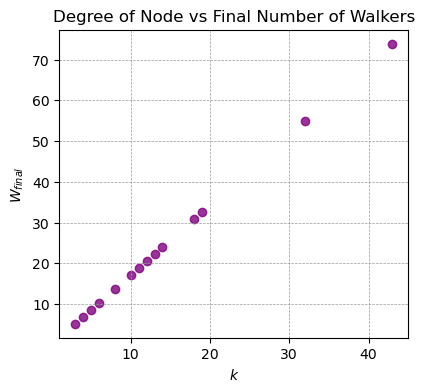

In [47]:
# Get the degree of each node
degrees = dict(ba_network.degree())

# Get the final number of walkers for each node
final_walkers = {node: walkers[-1] for node, walkers in wk_ba.items()}

# Create lists for degrees and final walkers
x = wk_ba.keys()
y = [final_walkers[node] for node in final_walkers]

# Plot the scatterplot
plt.figure(figsize=(4.5, 4))
plt.scatter(x, y, color='purple', alpha=0.8)
plt.xlabel('$k$')
plt.ylabel('$W_{final}$')
plt.title('Degree of Node vs Final Number of Walkers')
plt.grid(color = '#999999', linestyle = '--', linewidth = 0.5)
plt.show()

# Degree correlations

In [135]:
nx.degree_assortativity_coefficient(nx.erdos_renyi_graph(100, 0.05))

-0.1318283696878249

In [136]:
# Question 2
import random
def edge_exchange(G, t, max_u, node_attributes=False):
    """
    Perform a degree-preserving edge exchange algorithm on the graph G.
    
    The algorithm randomly selects pairs of edges and attempts to swap them while preserving 
    the node degrees and connectivity of the graph. The process continues until a specified number 
    of successful edge swaps (t) is reached or the maximum number of unsuccessful swap attempts (max_u) 
    is exceeded. The function also supports constraints based on node attributes.
    
    Parameters
    ----------
    G : networkx.Graph
        The input graph on which the edge exchange algorithm is applied. 
        The graph can be directed or undirected.
    
    t : int
        The target number of successful edge swaps to perform.
    
    max_u : int
        The maximum number of unsuccessful swap attempts allowed before terminating the algorithm.
    
    node_attributes : dict, optional (default=False)
        If provided, a dictionary of binary node attributes where the keys are node IDs and the values 
        are attributes. This ensures that node attributes are preserved along edges during edge swaps.
        If not provided, the algorithm does not consider node attributes.
    
    Returns
    -------
    G : networkx.Graph
        The graph after attempting the edge swaps, with the same node degrees but potentially 
        with different edge configurations.
    
    s : int
        The number of successful edge swaps performed.
    
    u : int
        The number of unsuccessful edge swap attempts.
    
    
    Warnings
    --------
    - A warning is printed if the maximum number of unsuccessful iterations is reached.
    - Unsuccessful swap attempts may occur when selected edges share nodes, the swapped edges already 
      exist, or the swap would break the graph's connectivity.
    
    Notes
    -----
    The edge swap maintains the degree distribution of the graph. An edge swap is deemed unsuccessful if:
    1. The edges share common nodes.
    2. The newly proposed edges already exist in the graph.
    3. The swap would change the number of connected components in the graph, thereby breaking connectivity.
    4. Node attributes are provided and the swap would result in a change in node attributes between the old and new edges.
    
    The algorithm terminates when either the specified number of successful swaps is reached or the number 
    of unsuccessful attempts exceeds the limit.
    """
    s = 0 # set successful counter to 0
    u = 0 # set unsuccessful counter to 0
    while s < t:
        if u >= max_u: # check if max number of unsuccessful iterations reached
            print("Maximum number of unsuccessful iterations reached")
            print("Terminating algorithm after", s, "successful and", u, "unsuccessful edge swaps")
            break
            
        edge_list = list(G.edges) # unpack nx.Graph into an edge list
        edge_1, edge_2 = random.sample(edge_list, 2) # choose two random edges from the edge list
        
        if edge_1[0] in edge_2 or edge_1[1] in edge_2: # check if any of the nodes are the same
            u = u + 1 # increment counter for unsucessful edge swap
            continue
            
        if (edge_1[0], edge_2[1]) in edge_list or (edge_1[1], edge_2[0]) in edge_list or (edge_2[1], edge_1[0]) in edge_list or (edge_2[0], edge_1[1]) in edge_list: # check if the proposed edges already exist
            u = u + 1 # increment counter for unsucessful edge swap
            continue

        # check if network would remain connected after edge swap
        F = G.copy()
        F.remove_edges_from([edge_1, edge_2])
        F.add_edges_from([(edge_1[0], edge_2[1]), (edge_1[1], edge_2[0])])
        
        if nx.number_connected_components(F) != nx.number_connected_components(G): # make sure n(connected components) stays the same
            u = u + 1 # increment counter for unsuccessful swap
            continue

        if nx.degree_assortativity_coefficient(F) < nx.degree_assortativity_coefficient(G): # make sure assortativity is not decreased
            u= u + 1
            continue

        if node_attributes:
            edge_1_attr = [node_attributes[edge_1[0]], node_attributes[edge_1[1]]]
            edge_2_attr = [node_attributes[edge_2[0]], node_attributes[edge_2[1]]]
            new_edge_1_attr = [node_attributes[edge_1[0]], node_attributes[edge_2[1]]]
            new_edge_2_attr = [node_attributes[edge_1[1]], node_attributes[edge_2[0]]]
            if edge_1_attr != new_edge_1_attr or edge_2_attr != new_edge_2_attr:
                u = u + 1
                continue
            
        # if everything is okay, perform the edge swap
        G.remove_edge(edge_1[0], edge_1[1]) # remove edge 1 (i,j)
        G.remove_edge(edge_2[0], edge_2[1]) # remove edge 2 (u,v)
        G.add_edge(edge_1[0], edge_2[1]) # add edge (i,v)
        G.add_edge(edge_1[1], edge_2[0]) # add edge (j,u)
        
        s = s + 1 # increment counter for successful edge swap
        
    return(G, s, u)
    

In [199]:
er = nx.erdos_renyi_graph(100, 0.05)
er_correlated, s, u = edge_exchange(er.copy(), 400, 1000)

In [200]:
nx.degree_assortativity_coefficient(er_correlated)

0.7149141833956886

In [201]:
nx.degree_assortativity_coefficient(er)

0.04896568791579749

In [202]:
W = 1000
w0 = {i: [0] if i != 0 else [1000] for i in er_correlated.nodes()} # all walkers start on node 0
t = 100
r = 0.5
wi_corr = deterministic_random_walk(er_correlated, w0, t, r)

W = 1000
w0 = {i: [0] if i != 0 else [W] for i in er_network.nodes()}
degree_dict = dict(nx.degree(er_correlated))
max_degree = max(degree_dict.values())
wk = {k: [0] for k in range(max_degree+1) if k in degree_dict.values()}
for i in er_network.nodes():
    wk[degree_dict[i]][0] += w0[i][0] 
wk_corr = degree_block_random_walk(er_correlated, wk, t, r)


In [203]:
nx.is_connected(er_correlated)

True

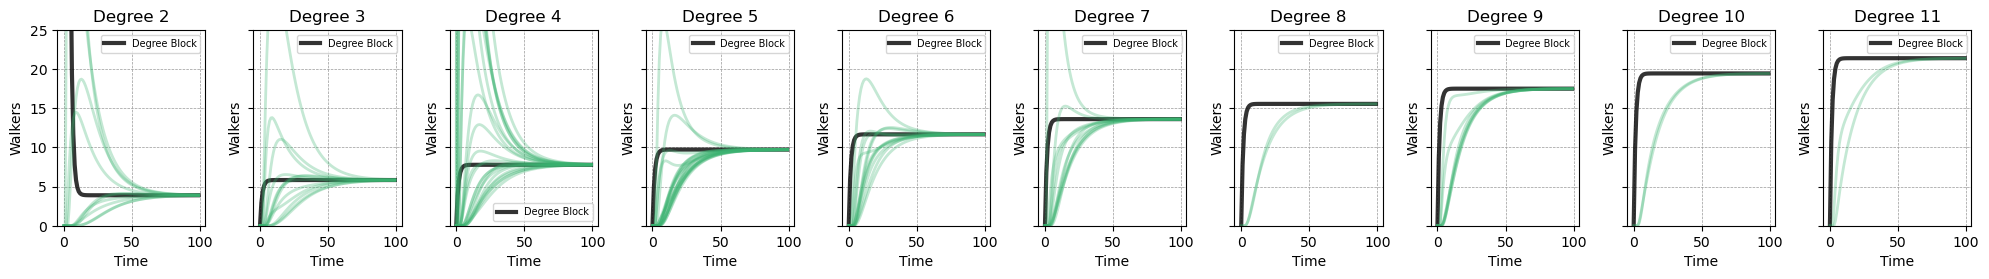

In [204]:
fig, axes = plt.subplots(2, 10, figsize=(20, 5), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
degrees = dict(er_correlated.degree())
# Plot the number of walkers in each degree class
for i, (degree_class, walkers) in enumerate(wk_corr.items()):
    if i >= max(degrees.values())+1:  # Only plot the first 13 panels
        break
    axes[i].plot(walkers, linewidth=3, color="black", alpha=0.8, label = 'Degree Block')
    axes[i].set_title(f'Degree {degree_class}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color='#999999', linestyle='--', linewidth=0.5)
    axes[i].set_ylim(0, 25)
    axes[i].legend(fontsize = 7)
    for k, n_walkers in wi_corr.items():
        if degrees[k] == degree_class:
            axes[i].plot(n_walkers, linewidth=2, color="mediumseagreen", alpha=0.3)

# Hide the remaining empty panels
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [205]:
W = 1000
w0 = {i: [0] if i != 0 else [1000] for i in er.nodes()} # all walkers start on node 0
t = 100
r = 0.5
wi_corr = deterministic_random_walk(er, w0, t, r)

W = 1000
w0 = {i: [0] if i != 0 else [W] for i in er.nodes()}
degree_dict = dict(nx.degree(er))
max_degree = max(degree_dict.values())
wk = {k: [0] for k in range(max_degree+1) if k in degree_dict.values()}
for i in er.nodes():
    wk[degree_dict[i]][0] += w0[i][0] 
wk_corr = degree_block_random_walk(er, wk, t, r)

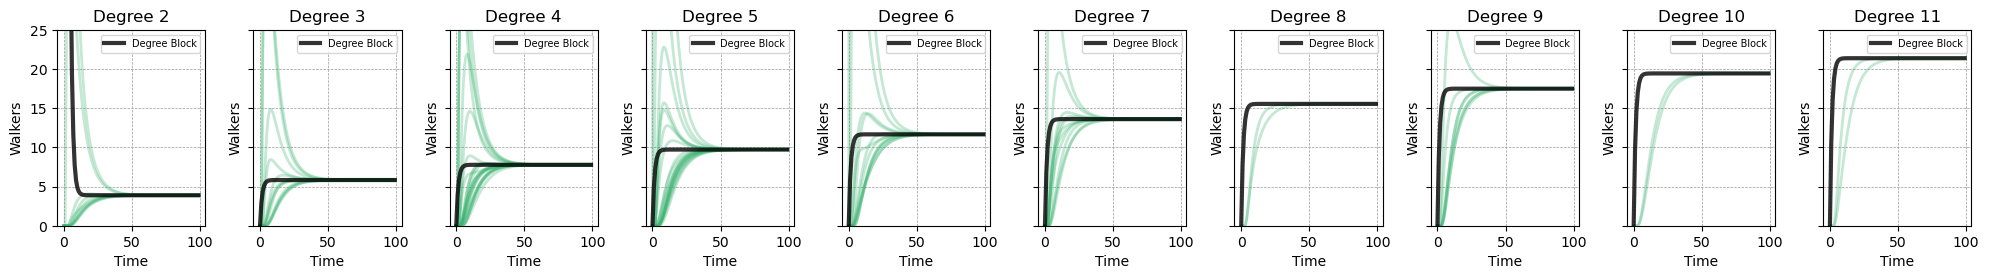

In [206]:
fig, axes = plt.subplots(2, 10, figsize=(20, 5), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()
degrees = dict(er_correlated.degree())
# Plot the number of walkers in each degree class
for i, (degree_class, walkers) in enumerate(wk_corr.items()):
    if i >= max(degrees.values())+1:  # Only plot the first 13 panels
        break
    for j, n_walkers in wi_corr.items():
        if degrees[j] == degree_class:
            axes[i].plot(n_walkers, linewidth=2, color="mediumseagreen", alpha=0.3)
    axes[i].plot(walkers, linewidth=3, color="black", alpha=0.8, label = 'Degree Block')
    axes[i].set_title(f'Degree {degree_class}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color='#999999', linestyle='--', linewidth=0.5)
    axes[i].set_ylim(0, 25)
    axes[i].legend(fontsize = 7)


# Hide the remaining empty panels
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Stochastic Random Walks

## Node based

In [7]:
import numpy as np

In [119]:
import numpy as np
import networkx as nx

def stochastic_random_walk(G, w0, t, r, n_realizations):
    """
    Simulates multiple realizations of a stochastic random walk on a graph.

    Parameters:
        G (networkx.Graph): The input graph on which the random walk is performed.
        w0 (dict): A dictionary mapping each node to a list representing the initial number of walkers at that node.
        t (int): The number of time steps for the random walk simulation.
        r (float): The proportion of walkers that move to neighboring nodes at each time step.
        n_realizations (int): The number of realizations of the stochastic process to run.

    Returns:
        tuple: A tuple containing two dictionaries:
            - mean_wt: A dictionary mapping each node to a list of the mean number of walkers at each time step.
            - all_realizations: A dictionary where each key is a node, and the value is a matrix of shape
              (n_realizations, t) containing the walker counts for all realizations.
    """
    nodes = list(G.nodes)
    num_nodes = len(nodes)

    # Initialize storage for all realizations
    all_realizations = {node: np.zeros((n_realizations, t)) for node in nodes}

    for realization in range(n_realizations):
        wt = {node: [w0[node][0]] for node in nodes}  # Initialize walkers for this realization
        degree_dict = dict(nx.degree(G))

        for _ in range(t - 1):
            temp_array = [0] * num_nodes  # Temporary array for new walker counts

            for i, n_walkers_list in wt.items():
                n_walkers = n_walkers_list[-1]  # Get W_i(t)
                neighbours = list(G.neighbors(i))  # Neighbours of node i
                ki = degree_dict[i]  # Degree of node i

                if ki == 0:  # Handle isolated nodes
                    print("NETWORK IS DISCONNECTED!")
                    break

                # Create probability vector for multinomial sampling
                p_hat = [r / ki] * ki
                p_hat.append(1 - r)

                # Draw multinomial sample
                sample = np.random.multinomial(n_walkers, p_hat)

                # Distribute walkers to neighbors
                new_sample = sample[:-1]
                for j, node in enumerate(neighbours):
                    temp_array[nodes.index(node)] += new_sample[j]

                # Update node i's walker count
                temp_array[nodes.index(i)] += sample[-1]

            # Update walker counts in `wt`
            for k, v in zip(nodes, temp_array):
                wt[k].append(v)

        # Store this realization
        for node in nodes:
            all_realizations[node][realization, :] = wt[node]

    # Compute the mean number of walkers for each node at each time step
    mean_wt = {
        node: np.mean(all_realizations[node], axis=0).tolist() for node in nodes
    }

    return mean_wt, all_realizations


In [104]:
er_network = nx.erdos_renyi_graph(100, 0.05)
W = 1000
wt0 = {i: [0] if i != 0 else [1000] for i in er_network.nodes()} # all walkers start on node 0

In [88]:
nx.is_connected(er_network)

True

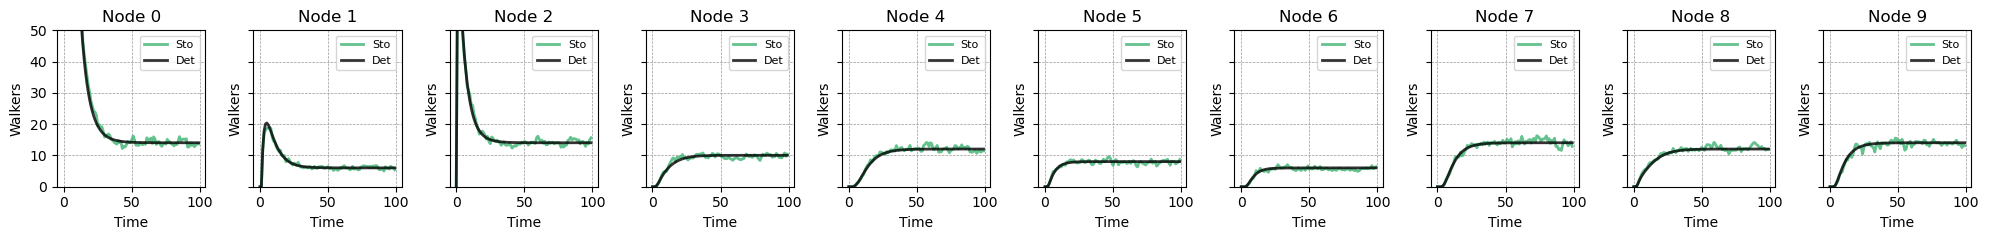

In [133]:
wt0 = {i: [0] if i != 0 else [1000] for i in er_network.nodes()} # all walkers start on node 0
wit_sto, wit_sto_all = stochastic_random_walk(er_network, wt0, t = 100, r = 0.5, n_realizations = 20)
wt0 = {i: [0] if i != 0 else [1000] for i in er_network.nodes()} # all walkers start on node 0
wit_det = deterministic_random_walk(er_network, wt0, 100, 0.5)
fig, axes = plt.subplots(1, 10, figsize=(20, 2.5), sharey=True)

for i, (node, walkers_sto) in enumerate(wit_sto.items()):
    if i >= 10:
        break
    # Get the corresponding deterministic walkers
    walkers_det = wit_det[node]
    
    # Plot stochastic random walk
    axes[i].plot(walkers_sto, linewidth=2, color="mediumseagreen", alpha=0.8, label="Sto")
    
    # Plot deterministic random walk
    axes[i].plot(walkers_det, linewidth=2, color="black", alpha=0.8, label="Det")
    
    axes[i].set_title(f'Node {node}')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Walkers')
    axes[i].grid(color='#999999', linestyle='--', linewidth=0.5)
    axes[i].set_ylim(0, 50)
    
    # Add legend to each subplot
    axes[i].legend(fontsize = 8)

plt.tight_layout()
plt.show()


## Degree Block Approximation

(Is this even possible?)

In [207]:
W = 1000
w0 = {i: [0] if i != 0 else [W] for i in er_network.nodes()}
degree_dict = dict(nx.degree(er_network))
max_degree = max(degree_dict.values())
wk = {k: [0] for k in range(max_degree+1) if k in degree_dict.values()}
for i in er_network.nodes():
    wk[degree_dict[i]][0] += w0[i][0] 

t = 100
r = 0.5
G = er_network
k_bar = sum(dict(G.degree()).values())/len(G.degree()) # average degree
pk = dict(sorted(Counter(dict(er_network.degree()).values()).items()))
pks = [pk[k]/len(er_network.nodes()) for k in pk.keys()]
for i in range(t-1):
    for k, n_walkers_list in wk.items():
        n_walkers = n_walkers_list[-1] # get W_k(t)
        p_hat = [(r / k) * (pk * k_prime/k_bar) for k_prime, pk in pks.items()] 
        p_hat.append(1 - r)

#         n_walkers_new = n_walkers - r*n_walkers + (k*r*W)/(k_bar*G.number_of_nodes()) # get W_k(t+1)
#         wk[k].append(n_walkers_new)

In [240]:
pk = dict(sorted(Counter(dict(er_network.degree()).values()).items()))
pks = {k:pk[k]/len(er_network.nodes()) for k in pk.keys()}

In [268]:
k = 7
arr = [(r / k) * (pk * k_prime/k_bar) for k_prime, pk in pks.items()]
[a/sum(arr) for a in arr]

[0.001838235294117647,
 0.011029411764705881,
 0.08823529411764705,
 0.14705882352941177,
 0.1286764705882353,
 0.14338235294117646,
 0.16727941176470587,
 0.19117647058823528,
 0.08272058823529412,
 0.01838235294117647,
 0.020220588235294115]

In [214]:
from collections import Counter

In [232]:
pk = dict(sorted(Counter(dict(er_network.degree()).values()).items()))
pks = [pk[k]/len(er_network.nodes()) for k in pk.keys()]
pks

[0.01, 0.03, 0.16, 0.2, 0.14, 0.13, 0.13, 0.13, 0.05, 0.01, 0.01]

# Convergence Speed

In [283]:
def converged(x, threshold=0.01):
    for i in range(9, len(x)):
        if all(abs(x[i] - x[i-j]) < threshold for j in range(1, 10)):
            return i
    return -1

In [286]:
convergence_wi_corr = [converged(x) for x in wi_corr.values()]
convergence_wk_corr = [converged(x) for x in wk_corr.values()]

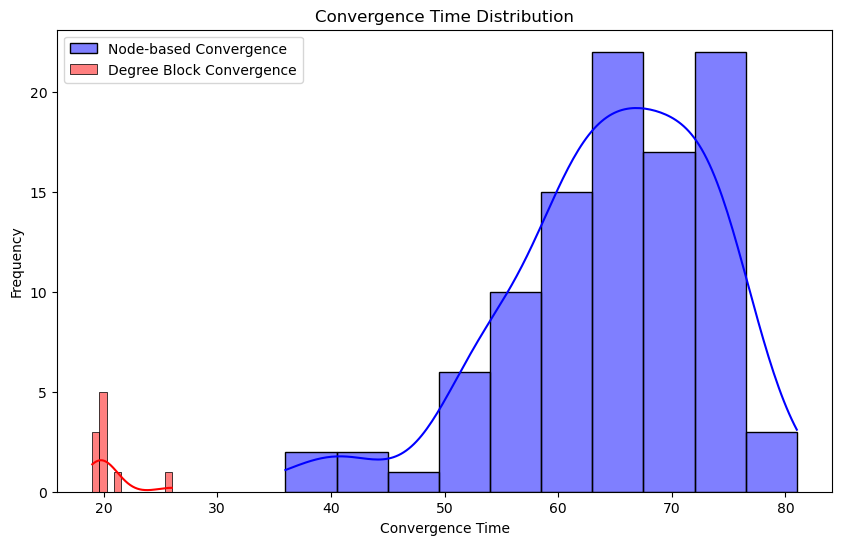

In [287]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot histograms with kernel density estimates
plt.figure(figsize=(10, 6))
sns.histplot(convergence_wi_corr, kde=True, color='blue', label='Node-based Convergence')
sns.histplot(convergence_wk_corr, kde=True, color='red', label='Degree Block Convergence')

# Add labels and title
plt.xlabel('Convergence Time')
plt.ylabel('Frequency')
plt.title('Convergence Time Distribution')
plt.legend()

# Show plot
plt.show()